### Use subject processor to plot TFRs

In [1]:
import sys
import os
from pathlib import Path
sys.path.append('/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/')
from eeg_toolkit.subject_processor import SubjectProcessor, Subject, SubjectGroup
from eeg_toolkit import preprocess

### Paths

In [2]:
# sl_method = 'dSPM'
sl_method = 'MNE'

In [3]:
# Settings
times_tup, time_win_path = preprocess.get_time_window(5)

# data paths
data_dir = Path("../../Data")
processed_data_path = data_dir / "Processed Data"
stc_path = data_dir / f"Source Time Courses ({sl_method})"
EO_resting_data_path = stc_path / "Eyes Open"
EC_resting_data_path = stc_path / "Eyes Closed"
zscored_epochs_data_path = stc_path / "zscored_Epochs" / time_win_path

# save paths
subset = "Representative TFR"
fc_path = data_dir / f"Functional Connectivity ({sl_method})"
fc_subset_path = fc_path / subset
save_path = fc_subset_path
os.makedirs(save_path, exist_ok=True)

# set up paths_dict for processor
paths_dict = {
    "processed_data_path": processed_data_path,
    "stc_path": stc_path,
    "EO_resting_data_path": EO_resting_data_path,
    "EC_resting_data_path": EC_resting_data_path,
    "zscored_epochs_data_path": zscored_epochs_data_path,
    "save_path": save_path
}

[-2.5,0.0,2.5]


### Manually enter age/sex matched subjects

In [4]:
# All CP and HC subs
sub_ids_CP = [  
    '018',
    '022',
    '024',
    '031',
    '032',
    '034',
    '036',
    '039',
    '040',
    '045',
    '046',
    '052', 
    '020',  
    '021',  
    '023',  
    '029',  
    '037',  
    '041',  
    '042',  
    '044',  
    '048',  
    '049',  
    '050',  
    '056' 
]

sub_ids_HC = [
    'C10',  
    'C11',  
    'C12',  
    'C13',  
    'C14',  
    'C15',  
    'C16',  
    'C17',  
    'C18',  
    'C19',  
    'C2.',  
    'C24',  
    'C25',  
    'C26',  
    'C27',  
    'C3.',  
    'C6.',  
    'C7.',  
    'C9.'  
]
  
# CP Subs with widespread pain
sub_ids_WSP = [
    '018',
    '022',
    '024',
    '031',
    '032',
    '034',
    '036',
    '039',
    '040',
    '045',
    '046',
    '052',
]

# CP Subs with localized pain
sub_ids_LP = [  
    '020',  
    '021',  
    '023',  
    '029',  
    '044',  
    '037',  
    '041',  
    '042',  
    '048',  
    '049',  
    '050',  
    '056'  
]

### Define ROIs, frequency bands, conditions, and methods for FC

In [5]:
####################################################################
# REGIONS OF INTEREST
# Get stc only from selected labels
roi_names = [# Left
             'rostralanteriorcingulate-lh', # Left Rostral ACC
             'caudalanteriorcingulate-lh', # Left Caudal ACC
             'postcentral-lh', # Left S1,
             'insula-lh', 'superiorfrontal-lh', # Left Insula, Left DL-PFC,
             'medialorbitofrontal-lh', # Left Medial-OFC
            #  # CONTROLS
            #  # lateral occipital
            #  'lateraloccipital-lh', # Left Visual Cortex
            #  'superiortemporal-lh', # Left Auditory Cortex
             # Right
             'rostralanteriorcingulate-rh', # Right Rostral ACC
             'caudalanteriorcingulate-rh', # Right Caudal ACC
             'postcentral-rh', # , Right S1
             'insula-rh', 'superiorfrontal-rh', # Right Insula, Right DL-PFC
             'medialorbitofrontal-rh', # Right Medial-OFC
            #  # CONTROLS
            #  'lateraloccipital-rh', # Right Visual Cortex
            #  'superiortemporal-rh', # Right Auditory Cortex
]

# Write out ROI names as acronyms
roi_acronyms = ["rACC-lh", "dACC-lh", "S1-lh", 
                "insula-lh", "dlPFC-lh", "mOFC-lh", 
                # # Controls
                # "lOCC-lh", "aud-lh",
                "rACC-rh", "dACC-rh", "S1-rh", 
                "insula-rh", "dlPFC-rh", "mOFC-rh", 
                # # Controls
                # "lOCC-rh", "aud-rh"
               ]

####################################################################
# BANDS OF INTEREST
Freq_Bands = { # Narrower bands and overlaps
        # 'delta': [0, 4],
        "theta": [4.0, 8.0],
        "alpha": [8.0, 13.0],
        "beta": [13.0, 30.0],
        "low-gamma": [30.0, 58.5],
        # # "notch": [58.5, 61.5],
        "high-gamma": [61.5, 100.0],
    }
band_names = [band for band in Freq_Bands]

####################################################################
# CONDITIONS
conditions = [
    "Hand 256 mN",
    # "Back 32 mN",
    # 'Back LS',
    # "Back 256 mN",
    "Eyes Open",
    # "Eyes Closed",
]

In [6]:
# Choose a subject list to focus on 
sub_ids_focus = sub_ids_CP

# Channel
channel = "Cz"

# Time range
time_range=(-0.2, 0.8)
# time_range=(0., 1.)

# Baseline
baseline=(-2.5, 0)

# TFR vlim range
vlim_individual = (-5, 5)
vlim_group = (-2.5, 2.5)

### Chronic Pain Group

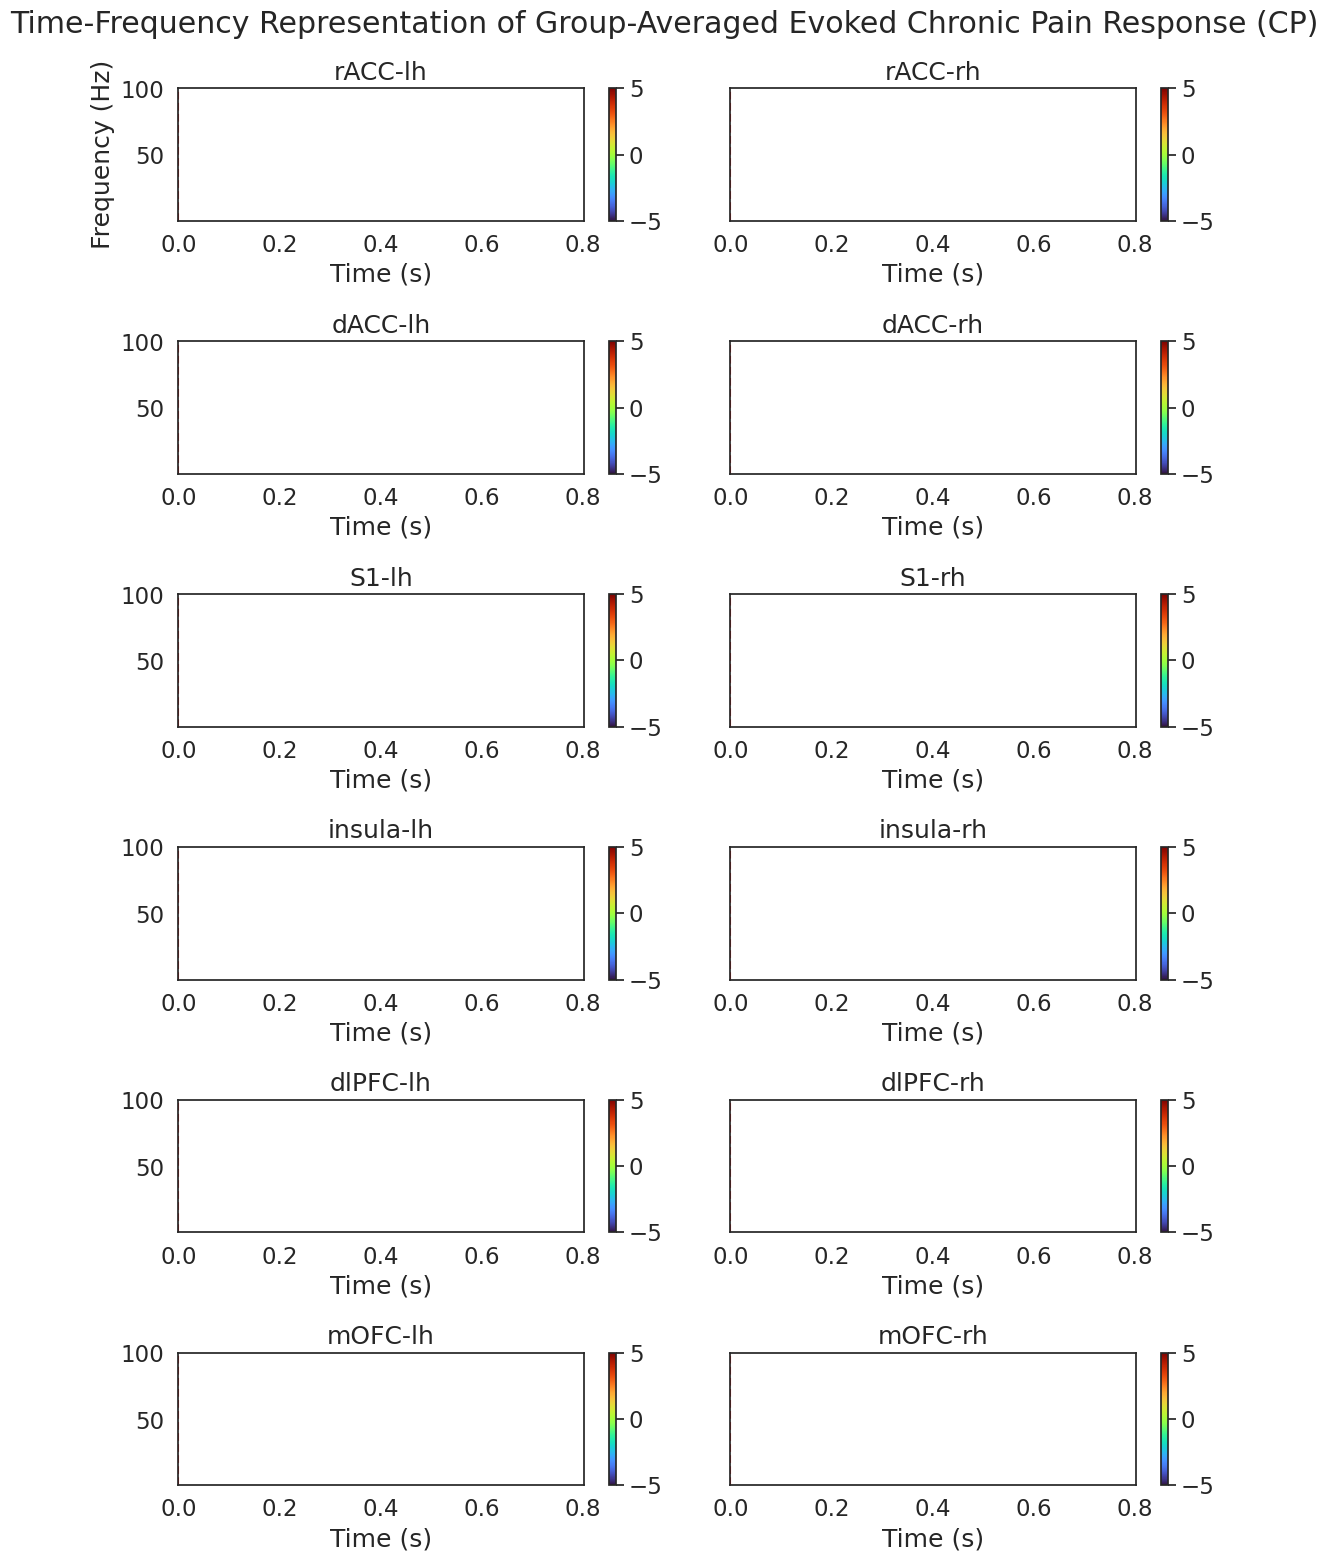

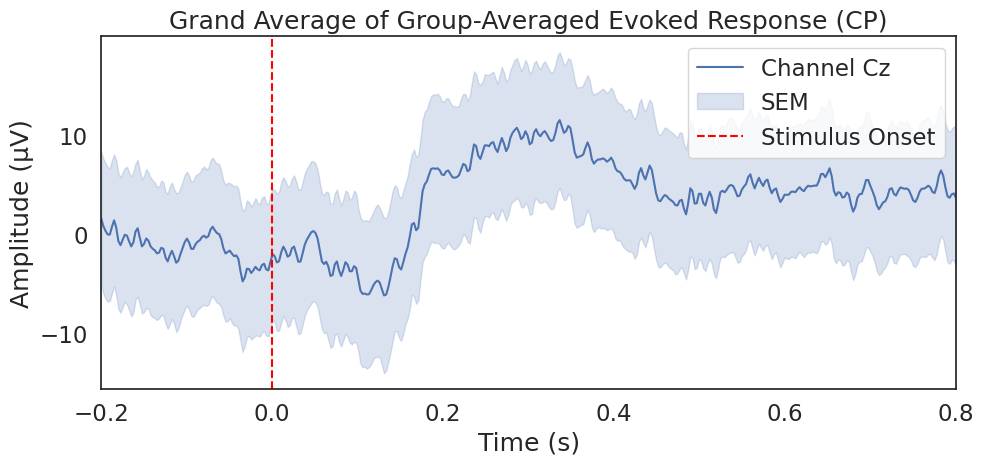

In [7]:
# Create an instance of SubjectProcessor
processor = SubjectProcessor(paths_dict, roi_acronyms)

# Loop through each subject and process the response
subjects = [Subject(sub_id) for sub_id in sub_ids_focus]
subject_group = SubjectGroup(subjects)

tfr, evoked_data_arrays = processor.plot_TFR_and_trace(subject_group,
                             channel=channel, 
                             baseline=baseline,
                             time_range=time_range,
                            #  vlim=vlim_group,
                             vlim=vlim_individual,
                            )

In [8]:
import numpy as np

# look for any nan values in tfr
print(np.isnan(tfr.get_data()).any())


False


In [9]:
# look for any nan values in evoked_data_arrays
look = evoked_data_arrays
# print exact indices of nan values
print(look.shape)
nan_indices = list(np.where(np.isnan(look)))


(24, 64, 2001)


In [10]:
nan_indices

[array([23, 23, 23, ..., 23, 23, 23]),
 array([ 5,  5,  5, ..., 27, 27, 27]),
 array([   0,    1,    2, ..., 1998, 1999, 2000])]

### Individual subjects, Chronic Pain

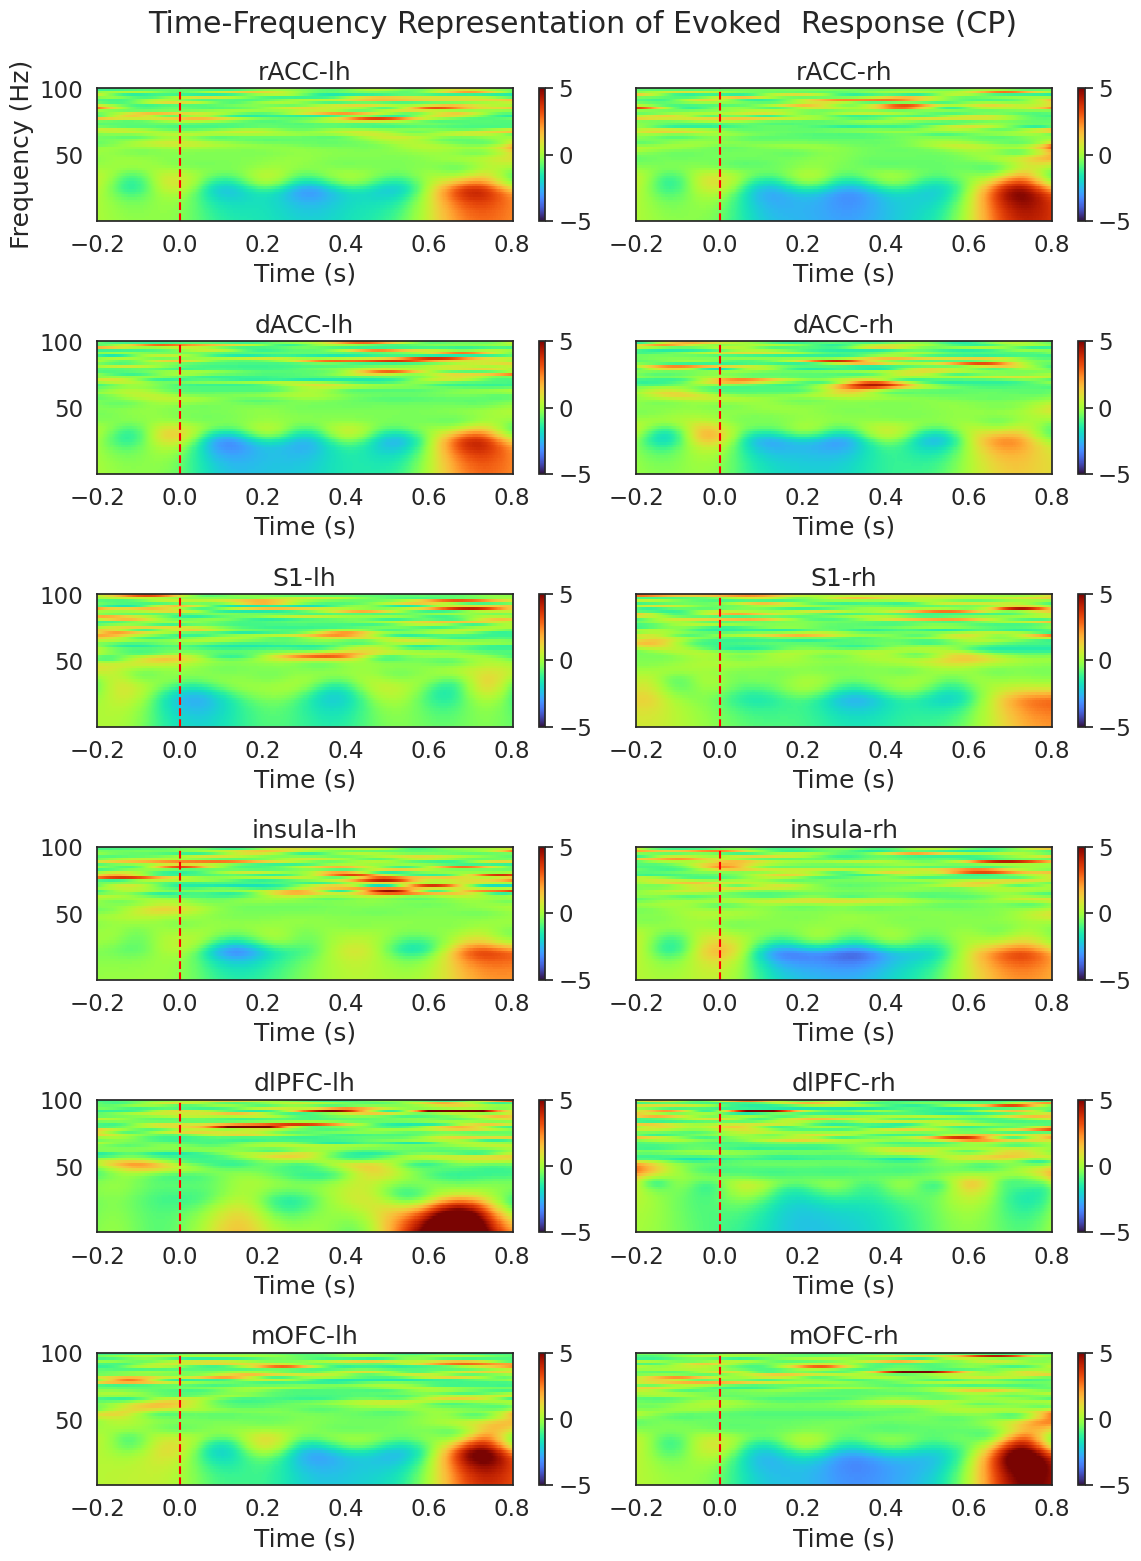

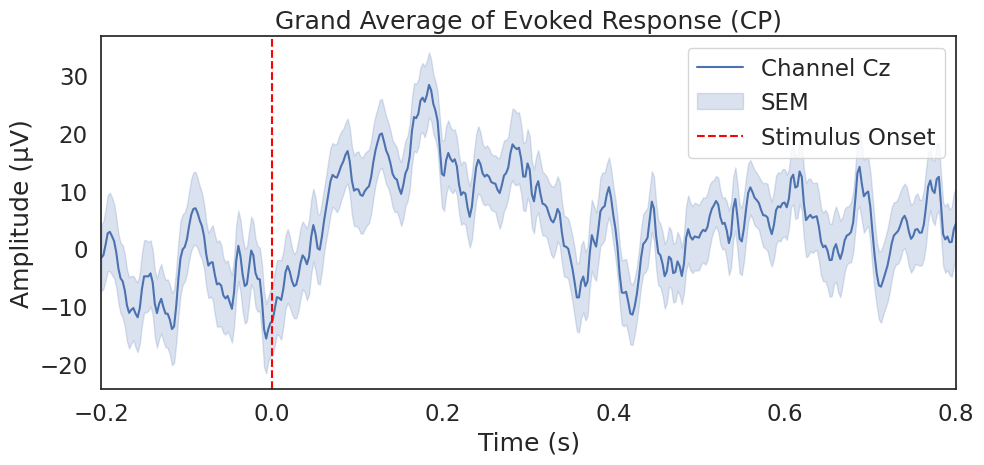

Yes List: []
No List: []
Maybe List: []


In [11]:
# Create an instance of SubjectProcessor
processor = SubjectProcessor(paths_dict, roi_acronyms)

# Loop through each subject and process the response
for sub_id in sub_ids_focus:
    subject = Subject(sub_id)
    processor.plot_TFR_and_trace(subject,
                                 channel=channel, 
                                 baseline=baseline,
                                 time_range=time_range,
                                 vlim=vlim_individual,
                                 )
    # processor.process_response(subject)
    break

# Display the results
processor.display_results()

In [12]:
print(subject)

Subject ID: 018, Group: CP, Response: None


### Healthy Control Group

In [13]:
# Choose a subject list to focus on 
sub_ids_focus = sub_ids_HC

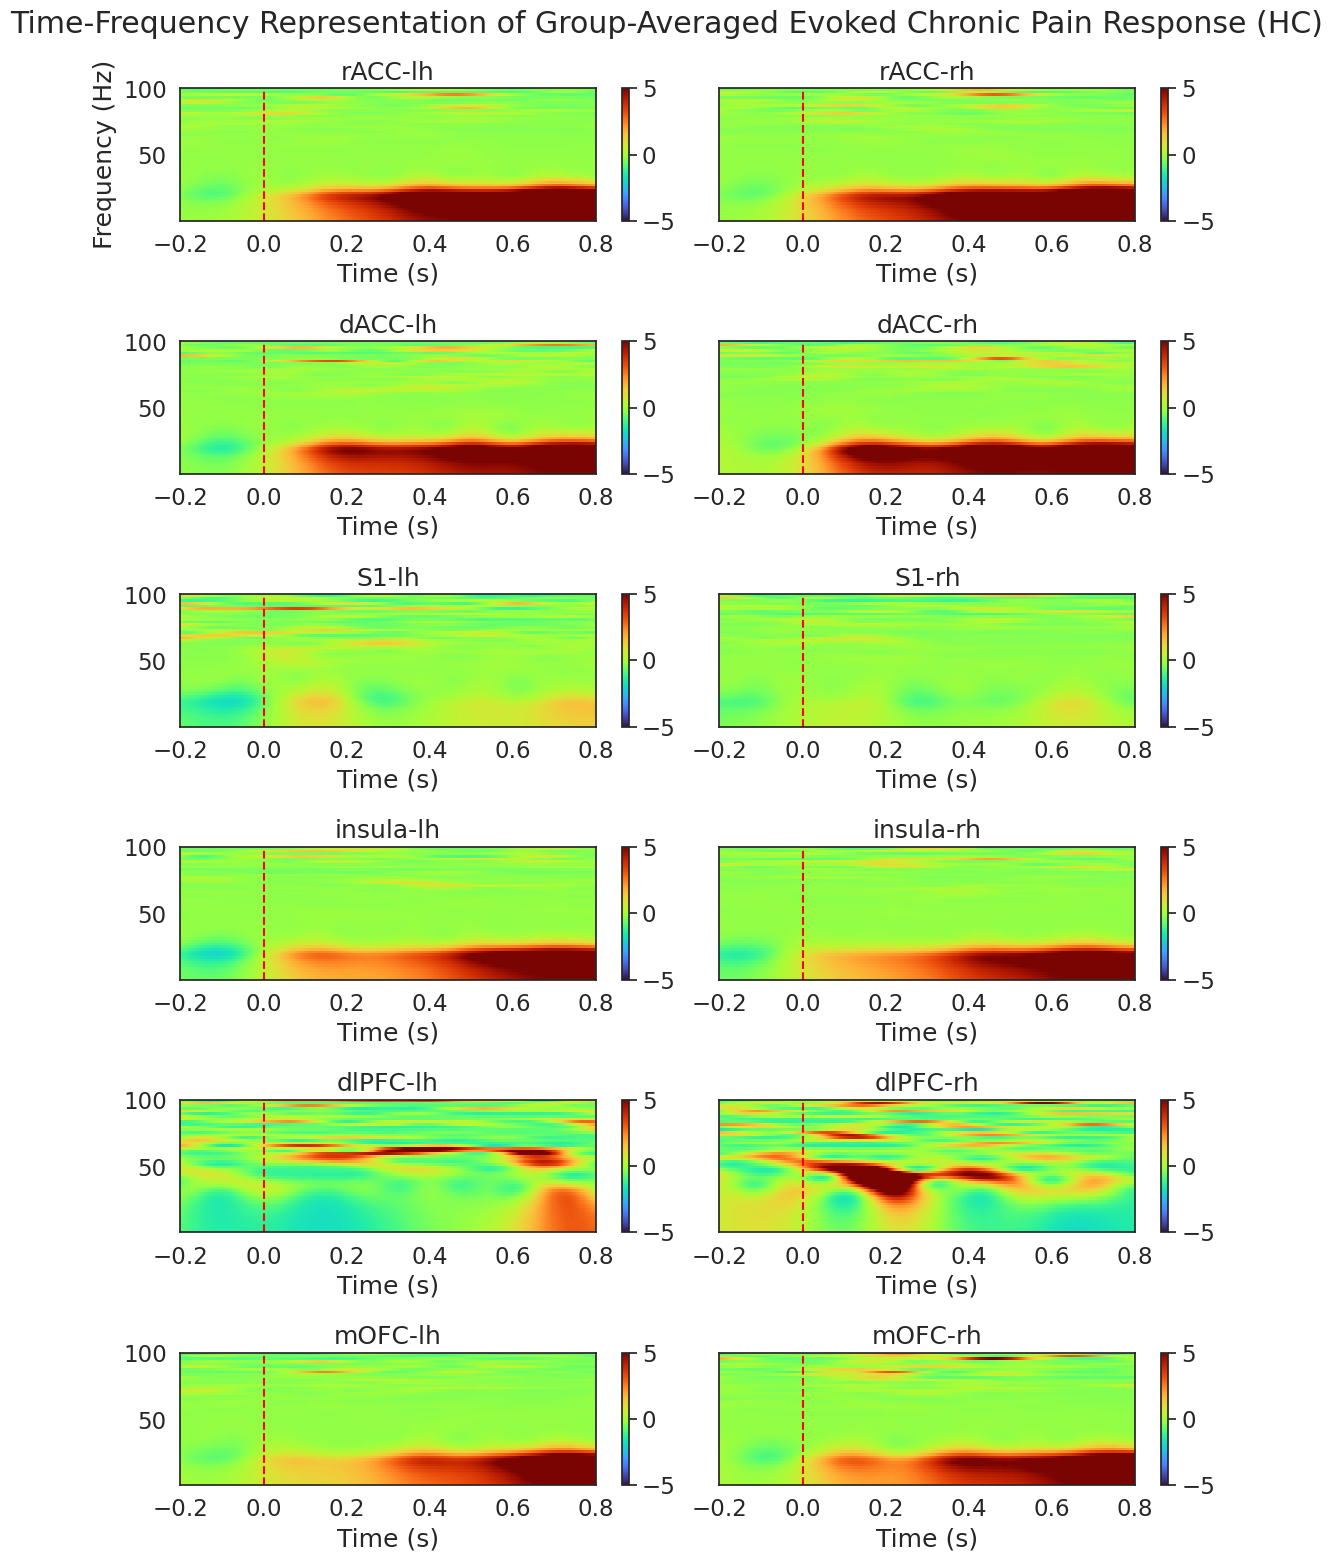

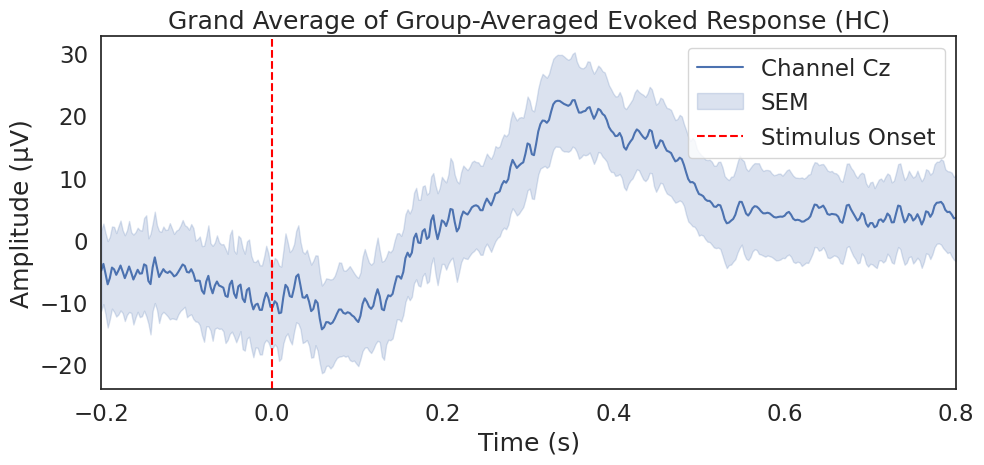

In [14]:
# Create an instance of SubjectProcessor
processor = SubjectProcessor(paths_dict, roi_acronyms)

# Loop through each subject and process the response
subjects = [Subject(sub_id) for sub_id in sub_ids_focus]
subject_group = SubjectGroup(subjects)

tfr, evoked_data_arrays = processor.plot_TFR_and_trace(subject_group,
                             channel=channel, 
                             baseline=baseline,
                             time_range=time_range,
                            #  vlim=vlim_group,
                             vlim=vlim_individual,
                            )